In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [2]:
data = pd.read_csv('./data/SMOTE_results.csv', encoding='ISO-8859-1')
data.head()

,model,dataset,metric,no-smote,smote
0,adaboost,abalone,accuracy,0.7440,0.7440
1,adaboost,abalone,auc_score,0.8545,0.8545
2,adaboost,abalone,f1_score,0.3851,0.3851
3,adaboost,abalone,precision,0.2538,0.2538
4,adaboost,abalone,recall,0.7976,0.7976


# Prepare Data and Variables

In [3]:
chart_cfg = {
    'border_visible': False,
    'transparency': True,
    'title_font_size': 18,
    'xlabel_font_size': 16,
    'ylabel_font_size': 16,
    'tick_font_size': 14,
    'font_color': '#888888',
    'legend_font_color': '#888888',
    'legend_font_size': 16,
    'colors': {'smote': '#98d4bb', 'no-smote': '#e6a57e', 'tie': '#cccccc'},
    'ordered_metrics': ['accuracy', 'auc_score', 'f1_score', 'precision', 'recall'],
    'ordered_models': [
        'naïve_bayes',
        'logistic_regression',
        'k_nearest_neighbors',
        'adaboost',
        'decision_tree',
        'support_vector_classifier',
        'artificial_neural_network',
        'multi_layer_perceptron',
        'explainable_boosting_machine',
        'extra_trees',
        'random_forest',
        'stacking_classifier',
        'catboost',
        'lightgbm',
        'xgboost',
    ]
}
chart_cfg

{'border_visible': False,
 'transparency': True,
 'title_font_size': 18,
 'xlabel_font_size': 16,
 'ylabel_font_size': 16,
 'tick_font_size': 14,
 'font_color': '#888888',
 'legend_font_color': '#888888',
 'legend_font_size': 16,
 'colors': {'smote': '#98d4bb', 'no-smote': '#e6a57e', 'tie': '#cccccc'},
 'ordered_metrics': ['accuracy',
  'auc_score',
  'f1_score',
  'precision',
  'recall'],
 'ordered_models': ['naïve_bayes',
  'logistic_regression',
  'k_nearest_neighbors',
  'adaboost',
  'decision_tree',
  'support_vector_classifier',
  'artificial_neural_network',
  'multi_layer_perceptron',
  'explainable_boosting_machine',
  'extra_trees',
  'random_forest',
  'stacking_classifier',
  'catboost',
  'lightgbm',
  'xgboost']}

In [4]:
# Create a function to classify the comparison between SMOTE and No-SMOTE
def classify_comparison(row):
    smote_val = row['smote']
    no_smote_val = row['no-smote']
    
    if smote_val > no_smote_val:
        return 'smote_is_better'
    elif smote_val < no_smote_val:
        return 'no_smote_is_better'
    else:
        return 'tie'

data['comparison'] = data.apply(lambda row: classify_comparison(row), axis=1)
data.head(5)

,model,dataset,metric,no-smote,smote,comparison
0,adaboost,abalone,accuracy,0.7440,0.7440,tie
1,adaboost,abalone,auc_score,0.8545,0.8545,tie
2,adaboost,abalone,f1_score,0.3851,0.3851,tie
3,adaboost,abalone,precision,0.2538,0.2538,tie
4,adaboost,abalone,recall,0.7976,0.7976,tie


## Average Metric Scores for Smote and No-Smote Scenarios

In [8]:
avg_metrics = data.groupby('metric')[['no-smote', 'smote']].mean()

<Figure size 1200x600 with 0 Axes>

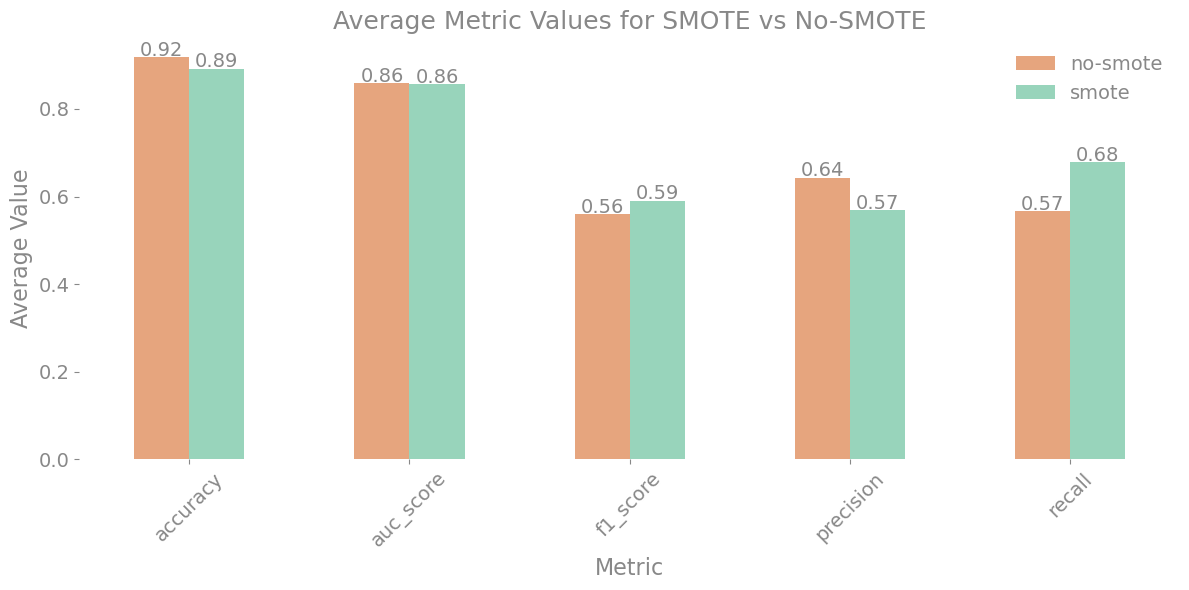

In [10]:
# Function to apply the global chart configuration
def apply_chart_cfg(ax):
    ax.spines['top'].set_visible(chart_cfg['border_visible'])
    ax.spines['right'].set_visible(chart_cfg['border_visible'])
    ax.spines['bottom'].set_visible(chart_cfg['border_visible'])
    ax.spines['left'].set_visible(chart_cfg['border_visible'])
    
    ax.set_facecolor("none")
    
    ax.set_title(ax.get_title(), color=chart_cfg['font_color'], fontsize=chart_cfg['title_font_size'])
    ax.set_xlabel(ax.get_xlabel(), color=chart_cfg['font_color'], fontsize=chart_cfg['xlabel_font_size'])
    ax.set_ylabel(ax.get_ylabel(), color=chart_cfg['font_color'], fontsize=chart_cfg['ylabel_font_size'])
    
    ax.tick_params(axis='x', colors=chart_cfg['font_color'], labelsize=chart_cfg['tick_font_size'])
    ax.tick_params(axis='y', colors=chart_cfg['font_color'], labelsize=chart_cfg['tick_font_size'])

    if chart_cfg['transparency']:
        ax.patch.set_alpha(0)

plt.figure(figsize=(12, 6))
ax = avg_metrics.plot(kind='bar', color=[chart_cfg['colors']['no-smote'], chart_cfg['colors']['smote']], figsize=(12, 6))

# Annotating bars with their rounded values
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points',
                fontsize=chart_cfg['tick_font_size'],
                color=chart_cfg['font_color'])

plt.title('Average Metric Values for SMOTE vs No-SMOTE')
plt.ylabel('Average Value')
plt.xlabel('Metric')
legend = plt.legend(facecolor='none', edgecolor='none', fontsize=chart_cfg['tick_font_size'])
plt.setp(legend.get_texts(), color=chart_cfg['legend_font_color'])
plt.xticks(rotation=45)
apply_chart_cfg(plt.gca())
plt.tight_layout()
plt.show()



# % of Time Scenario is Better

In [11]:
comparison_counts = data[['model', 'dataset']].drop_duplicates().shape[0]
comparison_counts

465

## Overall across models and datasets

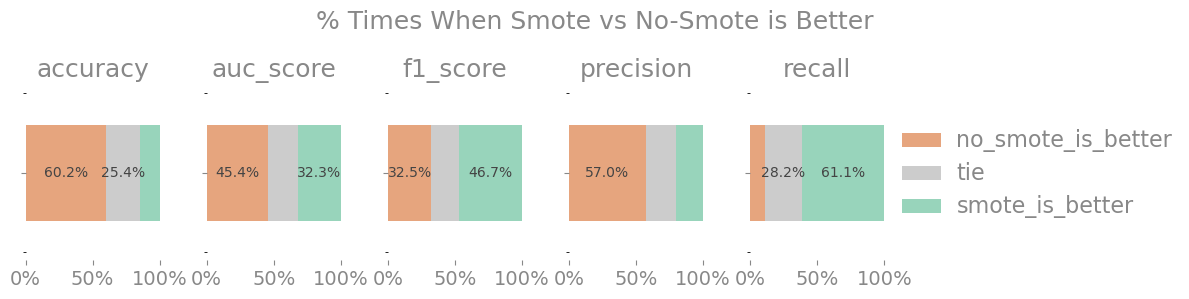

In [12]:
# Calculate the percentage of comparisons where SMOTE was better, No-SMOTE was better, or there was a tie for each metric
comparison_columns = ['no_smote_is_better', 'tie', 'smote_is_better']
comparison_counts = data\
    .groupby('metric')['comparison']\
    .value_counts(normalize=True)\
    .unstack()\
    .loc[chart_cfg['ordered_metrics']]

comparison_counts = comparison_counts[comparison_columns]

# Create sub-plots with 5 columns (one for each metric) and 1 row
fig, axes = plt.subplots(1, 5, figsize=(12, 3), sharey=True)

# Plot each subplot
for ax, metric in zip(axes, chart_cfg['ordered_metrics']):
    comparison_counts\
        .loc[[metric]][comparison_columns]\
        .plot(
            kind='barh',
            stacked=True,
            color=[
                    chart_cfg['colors']['no-smote'],
                    chart_cfg['colors']['tie'],
                    chart_cfg['colors']['smote']
            ],
            ax=ax,
            legend=False,
            width=0.6
    )
    ax.set_title(metric, fontsize=chart_cfg['title_font_size'], color=chart_cfg['font_color'])
    # ax.set_xlabel('Percentage', fontsize=chart_cfg['xlabel_font_size'], color=chart_cfg['font_color'])
    ax.tick_params(axis='x', colors=chart_cfg['font_color'], labelsize=chart_cfg['tick_font_size'])
    ax.tick_params(axis='y', colors=chart_cfg['font_color'], labelsize=chart_cfg['tick_font_size'])
    ax.set_xlim(0, 1)
    ax.xaxis.set_major_formatter(lambda x, _: f'{100*x:.0f}%')
    apply_chart_cfg(ax)
    ax.set_ylabel('')
    ax.set_yticklabels('')
    
    # Annotate each stack with its value
    for p in ax.patches:
        width = p.get_width()
        if width > 0.25:  # Displaying percentage only if it's greater than 15%
            ax.annotate(f"{width*100:.1f}%", 
                        (p.get_x() + width/2, p.get_y() + p.get_height()/2), 
                        ha='center', va='center', 
                        color='#444444',
                        fontsize=10)

plt.suptitle(
    '% Times When Smote vs No-Smote is Better',
    fontsize=chart_cfg['title_font_size'],
    color=chart_cfg['font_color']
)


# Adjust layout and show the plot
legend = axes[4]\
    .legend(
#         title='Scenario',
        bbox_to_anchor=(1.0, 0.85),
        facecolor='none',
        edgecolor='none',
        fontsize=chart_cfg['tick_font_size'],
        title_fontsize=chart_cfg['tick_font_size'],
#         color='#ccc'
    )

# Set font color for the legend text
for text in legend.get_texts():
    text.set_color(chart_cfg['legend_font_color'])
    text.set_fontsize(chart_cfg['legend_font_size'])
plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()
    

## Smote vs No-Smote For Each Model

In [15]:
# Calculate the mean and standard deviation for SMOTE and No-SMOTE scenarios for each model and metric
mean_smote = data.groupby(['model', 'metric'])['smote'].mean().unstack().round(3)
std_smote = data.groupby(['model', 'metric'])['smote'].std().unstack().round(3)

mean_no_smote = data.groupby(['model', 'metric'])['no-smote'].mean().unstack().round(3)
std_no_smote = data.groupby(['model', 'metric'])['no-smote'].std().unstack().round(3)

df_smote = mean_smote.copy()
for metric in chart_cfg['ordered_metrics']:
    df_smote[metric] = \
        mean_smote[metric].round(3).astype(str) + "+/-" + \
        std_smote[metric].round(3).astype(str)

df_smote.insert(0, 'source', "smote")
#print(df_smote.head())

df_no_smote = mean_smote.copy()
for metric in chart_cfg['ordered_metrics']:
    df_no_smote[metric] = \
        mean_no_smote[metric].round(3).astype(str) + "+/-" + \
        std_no_smote[metric].round(3).astype(str)

df_no_smote.insert(0, 'source', "no-smote")
#print(df_no_smote.head())

# Combine the dataframes with multi-level index
table = pd.concat([df_smote.reset_index(), df_no_smote.reset_index()], axis=0, ignore_index=True)

# Convert 'model' column to Categorical with a custom order
table['model'] = pd.Categorical(table['model'], categories=chart_cfg['ordered_models'], ordered=True)

# Set the multi-index and sort
table_sorted = table.set_index(['model', 'source']).sort_index()
table_sorted

metric                                      accuracy      auc_score  \
model                        source                                   
naïve_bayes                  no-smote  0.759+/-0.245  0.805+/-0.137   
                             smote     0.716+/-0.223  0.804+/-0.126   
logistic_regression          no-smote   0.93+/-0.054  0.867+/-0.132   
                             smote     0.829+/-0.126   0.867+/-0.13   
k_nearest_neighbors          no-smote  0.931+/-0.062  0.818+/-0.148   
                             smote     0.865+/-0.114  0.824+/-0.151   
adaboost                     no-smote  0.848+/-0.119   0.876+/-0.13   
                             smote     0.848+/-0.119   0.877+/-0.13   
decision_tree                no-smote  0.918+/-0.079  0.759+/-0.161   
                             smote     0.909+/-0.084  0.767+/-0.166   
support_vector_classifier    no-smote  0.938+/-0.057  0.837+/-0.176   
                             smote     0.887+/-0.111  0.864+/-0.156   
artificial_neural_network    no-smote  0.937+/-0.059  0.866+/-0.152   
                             smote     0.901+/-0.101  0.854+/-0.155   
multi_layer_perceptron       no-smote  0.935+/-0.063  0.871+/-0.142   
                             smote     0.906+/-0.094  0.851+/-0.162   
explainable_boosting_machine no-smote  0.927+/-0.073  0.866+/-0.148   
                             smote     0.927+/-0.073  0.866+/-0.148   
extra_trees                  no-smote   0.938+/-0.06  0.889+/-0.135   
                             smote     0.933+/-0.064  0.888+/-0.134   
random_forest                no-smote  0.942+/-0.058  0.889+/-0.132   
                             smote     0.935+/-0.065  0.889+/-0.134   
stacking_classifier          no-smote  0.944+/-0.059    0.9+/-0.125   
                             smote     0.934+/-0.068  0.869+/-0.154   
catboost                     no-smote  0.944+/-0.056  0.894+/-0.132   
                             smote     0.915+/-0.089  0.884+/-0.142   
lightgbm                     no-smote  0.942+/-0.059  0.881+/-0.134   
                             smote     0.934+/-0.067   0.874+/-0.14   
xgboost                      no-smote   0.932+/-0.07  0.869+/-0.154   
                             smote     0.931+/-0.071  0.869+/-0.154   

metric                                      f1_score      precision  \
model                        source                                   
naïve_bayes                  no-smote  0.396+/-0.219  0.349+/-0.231   
                             smote     0.363+/-0.217    0.3+/-0.244   
logistic_regression          no-smote   0.448+/-0.36  0.634+/-0.344   
                             smote       0.52+/-0.24  0.424+/-0.261   
k_nearest_neighbors          no-smote  0.517+/-0.345  0.648+/-0.321   
                             smote     0.565+/-0.265  0.498+/-0.298   
adaboost                     no-smote  0.547+/-0.246  0.451+/-0.274   
                             smote     0.549+/-0.245  0.452+/-0.273   
decision_tree                no-smote  0.601+/-0.294    0.602+/-0.3   
                             smote       0.596+/-0.3  0.574+/-0.309   
support_vector_classifier    no-smote  0.532+/-0.387  0.666+/-0.346   
                             smote     0.615+/-0.288  0.555+/-0.312   
artificial_neural_network    no-smote   0.569+/-0.37  0.665+/-0.298   
                             smote     0.608+/-0.301  0.571+/-0.313   
multi_layer_perceptron       no-smote  0.582+/-0.357   0.645+/-0.33   
                             smote     0.619+/-0.294   0.58+/-0.303   
explainable_boosting_machine no-smote   0.626+/-0.32  0.631+/-0.312   
                             smote     0.625+/-0.321  0.631+/-0.312   
extra_trees                  no-smote  0.574+/-0.339  0.718+/-0.282   
                             smote       0.61+/-0.31  0.678+/-0.295   
random_forest                no-smote  0.584+/-0.357  0.774+/-0.262   
                             smote     0.643+/-0.296  0.677+/-0.288   
stacking_classifier    

In [491]:
table_sorted.to_csv("./results/results-mean-stddev.csv")

C:\Users\abbus\AppData\Local\Temp\ipykernel_5540\2148981782.py:53: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


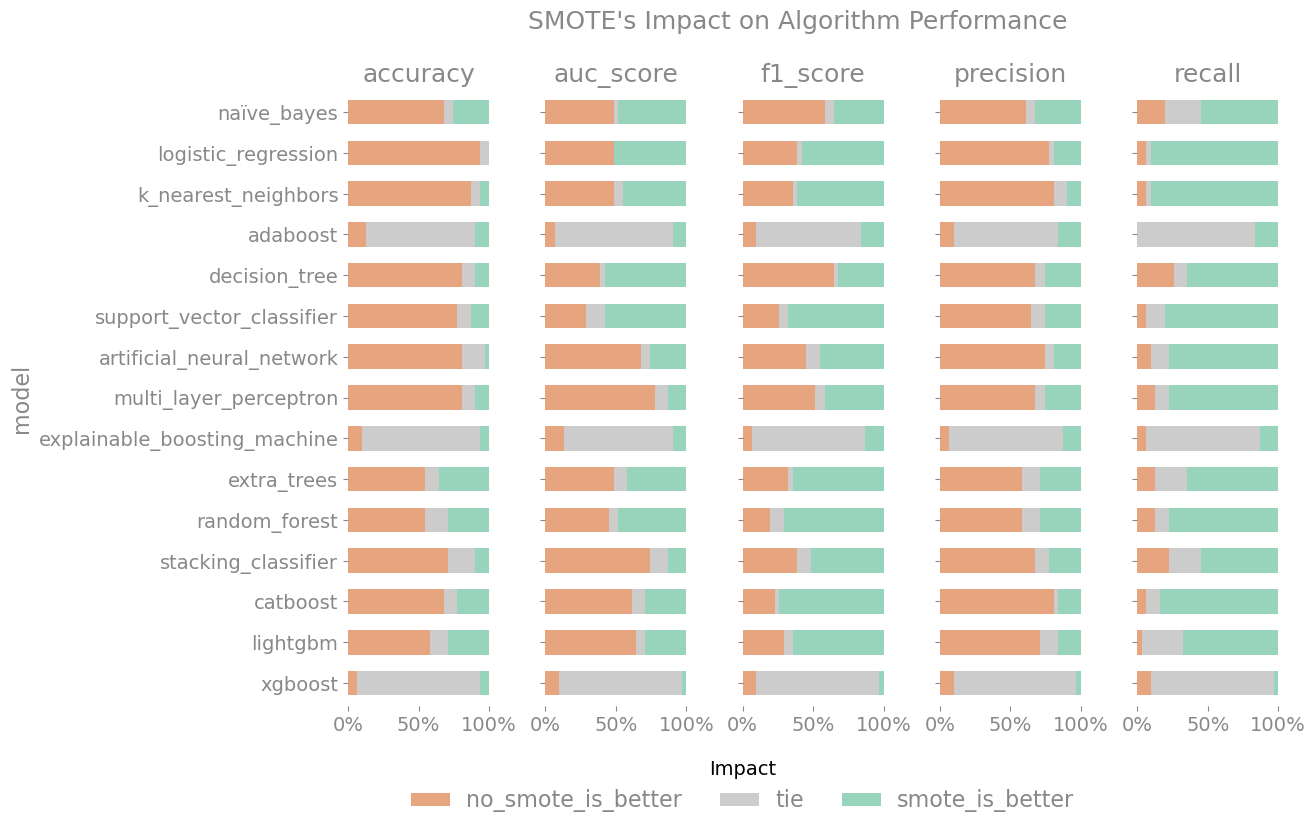

In [16]:
# Calculate the percentage of comparisons where SMOTE was better, No-SMOTE was better, or there was a tie for each metric and model
comparison_counts_model = data.groupby(['metric', 'model'])['comparison'].value_counts(normalize=True).unstack().fillna(0)
# comparison_counts_model

# Create sub-plots with 5 columns (one for each metric) and 1 row
fig, axes = plt.subplots(1, 5, figsize=(12, 8), sharey=True)

for col, metric in enumerate(chart_cfg['ordered_metrics']):  
    ax = axes[col]
    df = comparison_counts_model.loc[metric]
    df = df.reindex(chart_cfg['ordered_models'][::-1])
    df[comparison_columns].plot(
        kind='barh',
        stacked=True,
        ax=ax,        
        color=[
            chart_cfg['colors']['no-smote'],
            chart_cfg['colors']['tie'],
            chart_cfg['colors']['smote']
        ],
        legend=False,
        width=0.6
    )
    ax.set_xlim(0, 1)
    ax.set_title(metric, fontsize=chart_cfg['title_font_size'], color=chart_cfg['font_color'])
    ax.xaxis.set_major_formatter(lambda x, _: f'{100*x:.0f}%')
    ax.tick_params(axis='x', colors=chart_cfg['font_color'], labelsize=chart_cfg['tick_font_size'])
    ax.tick_params(axis='y', colors=chart_cfg['font_color'], labelsize=chart_cfg['tick_font_size'])
    apply_chart_cfg(ax)

plt.suptitle(
    "SMOTE's Impact on Algorithm Performance",
    fontsize=chart_cfg['title_font_size'],
    color=chart_cfg['font_color']
)

# Adjust layout and show the plot
legend = axes[2]\
    .legend(
        title='Impact',
        bbox_to_anchor=(0.0, -0.2),
        loc='lower center',
        facecolor='none',
        edgecolor='none',
        fontsize=chart_cfg['tick_font_size'],
        title_fontsize=chart_cfg['tick_font_size'],
        ncol=3
    )
# Set font color for the legend text
for text in legend.get_texts():
    text.set_color(chart_cfg['legend_font_color'])
    text.set_fontsize(chart_cfg['legend_font_size'])
plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.show()

# Smote vs No-Smote for Each Dataset

In [31]:
data.head()

,model,dataset,metric,no-smote,smote,comparison
0,adaboost,abalone,accuracy,0.7440,0.7440,tie
1,adaboost,abalone,auc_score,0.8545,0.8545,tie
2,adaboost,abalone,f1_score,0.3851,0.3851,tie
3,adaboost,abalone,precision,0.2538,0.2538,tie
4,adaboost,abalone,recall,0.7976,0.7976,tie


In [32]:
datasets = data['dataset'].drop_duplicates().tolist()
datasets

['abalone',
 'auction',
 'car_eval_34',
 'chess',
 'climate_simulation_crashes',
 'club_loan',
 'coil_2000',
 'graduation',
 'jm1',
 'kc1',
 'letter_img',
 'mammography',
 'optical_digits',
 'ozone_level',
 'page_blocks',
 'pc1',
 'pen_digits',
 'pie_chart',
 'satellite',
 'satimage',
 'seismic_bumps',
 'shuttle',
 'sick_euthyroid',
 'solar_flare',
 'thoracic_surgery',
 'thyroid_disease',
 'us_crime',
 'vowel',
 'wilt',
 'wine_quality',
 'yeast']

In [29]:
# Calculate the mean and standard deviation for SMOTE and No-SMOTE scenarios for each model and metric

# Smote scenario
mean_smote_by_dataset = data.groupby(['dataset', 'metric'])['smote'].mean().unstack().round(3)
std_smote_by_dataset = data.groupby(['dataset', 'metric'])['smote'].std().unstack().round(3)

df_smote_by_dataset = mean_smote_by_dataset.copy()
for metric in chart_cfg['ordered_metrics']:
    df_smote_by_dataset[metric] = \
        mean_smote_by_dataset[metric].round(3).astype(str) + "+/-" + \
        std_smote_by_dataset[metric].round(3).astype(str)

df_smote_by_dataset.insert(0, 'source', "smote")
#print(df_smote_by_dataset.head())

# No-Smote scenario
mean_no_smote_by_dataset = data.groupby(['dataset', 'metric'])['no-smote'].mean().unstack().round(3)
std_no_smote_by_dataset = data.groupby(['dataset', 'metric'])['no-smote'].std().unstack().round(3)

df_no_smote_by_dataset = mean_no_smote_by_dataset.copy()
for metric in chart_cfg['ordered_metrics']:
    df_no_smote_by_dataset[metric] = \
        mean_no_smote_by_dataset[metric].round(3).astype(str) + "+/-" + \
        std_no_smote_by_dataset[metric].round(3).astype(str)

df_no_smote_by_dataset.insert(0, 'source', "no-smote")
#print(df_no_smote.head())

# Combine the dataframes with multi-level index
table_by_dataset = pd.concat(
    [df_smote_by_dataset.reset_index(), df_no_smote_by_dataset.reset_index()],
    axis=0,
    ignore_index=True
)

# Set the multi-index and sort
table_sorted_by_dataset = table_by_dataset.set_index(['dataset', 'source']).sort_index()
table_sorted_by_dataset

metric                      accuracy      auc_score       f1_score  \
dataset      source                                                  
abalone      no-smote  0.865+/-0.055   0.81+/-0.074    0.16+/-0.15   
             smote      0.814+/-0.06  0.808+/-0.073  0.355+/-0.063   
auction      no-smote  0.932+/-0.067    0.918+/-0.1  0.692+/-0.319   
             smote      0.903+/-0.11  0.926+/-0.096  0.741+/-0.247   
car_eval_34  no-smote  0.967+/-0.023  0.986+/-0.024  0.829+/-0.092   
...                              ...            ...            ...   
wilt         smote      0.951+/-0.09  0.965+/-0.052  0.751+/-0.185   
wine_quality no-smote  0.958+/-0.032  0.804+/-0.069  0.241+/-0.099   
             smote     0.919+/-0.061  0.782+/-0.057  0.279+/-0.073   
yeast        no-smote  0.905+/-0.132  0.959+/-0.058  0.706+/-0.124   
             smote      0.897+/-0.15  0.964+/-0.027  0.731+/-0.132   

metric                     precision         recall  
dataset      source                                  
abalone      no-smote  0.213+/-0.148  0.202+/-0.271  
             smote     0.295+/-0.044  0.538+/-0.242  
auction      no-smote  0.777+/-0.261  0.664+/-0.342  
             smote     0.719+/-0.305  0.811+/-0.165  
car_eval_34  no-smote  0.772+/-0.128  0.919+/-0.098  
...                              ...            ...  
wilt         smote     0.729+/-0.233  0.838+/-0.064  
wine_quality no-smote   0.432+/-0.23   0.22+/-0.149  
             smote     0.273+/-0.152  0.418+/-0.146  
yeast        no-smote  0.754+/-0.168  0.714+/-0.131  
             smote      0.681+/-0.16  0.836+/-0.088  

[62 rows x 5 columns]

C:\Users\abbus\AppData\Local\Temp\ipykernel_5540\3863105462.py:54: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


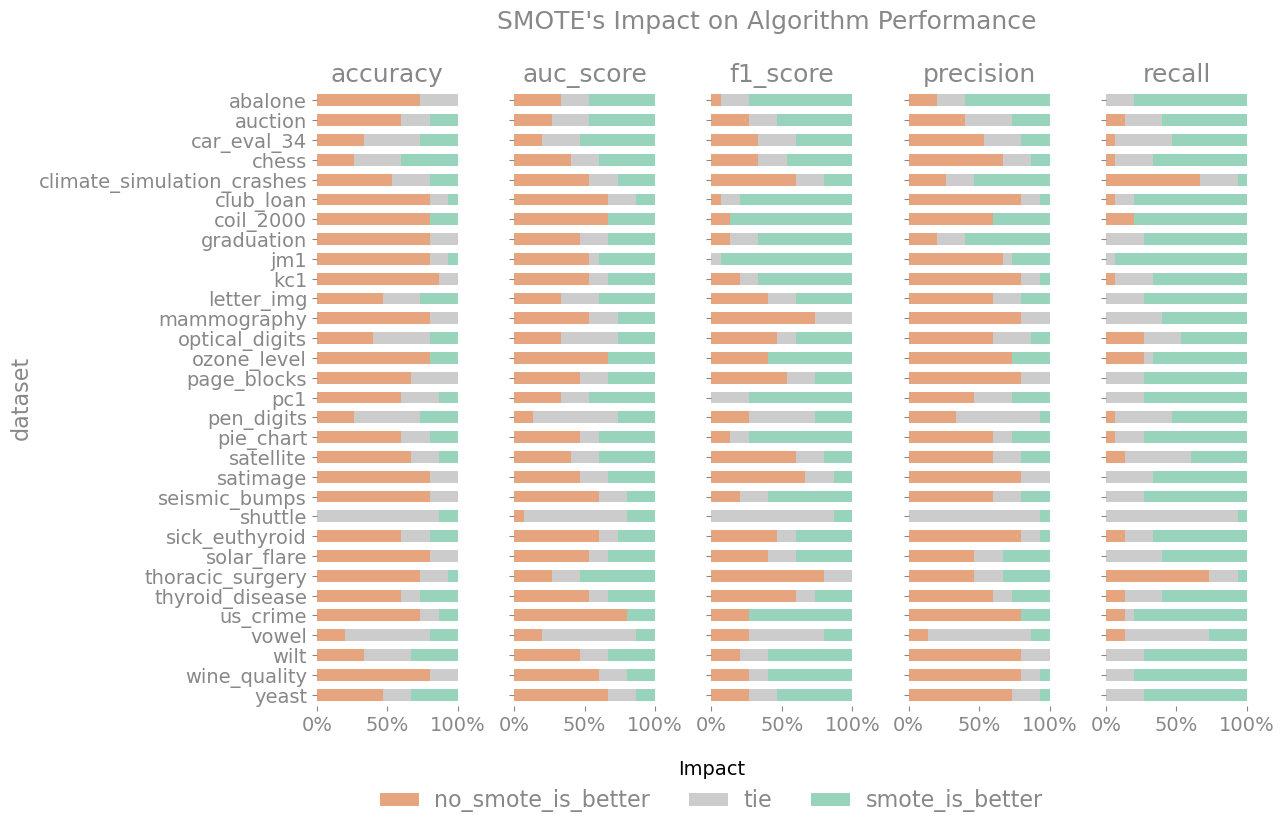

In [33]:
# Calculate the percentage of comparisons where SMOTE was better, No-SMOTE was better, 
# or there was a tie for each metric and dataset
comparison_counts_dataset = data.groupby(['metric', 'dataset'])['comparison'].value_counts(normalize=True).unstack().fillna(0)
# comparison_counts_model

# Create sub-plots with 5 columns (one for each metric) and 1 row
fig, axes = plt.subplots(1, 5, figsize=(12, 8), sharey=True)

for col, metric in enumerate(chart_cfg['ordered_metrics']):  
    ax = axes[col]
    df = comparison_counts_dataset.loc[metric]
    df = df.reindex(datasets[::-1])
    df[comparison_columns].plot(
        kind='barh',
        stacked=True,
        ax=ax,        
        color=[
            chart_cfg['colors']['no-smote'],
            chart_cfg['colors']['tie'],
            chart_cfg['colors']['smote']
        ],
        legend=False,
        width=0.6
    )
    ax.set_xlim(0, 1)
    ax.set_title(metric, fontsize=chart_cfg['title_font_size'], color=chart_cfg['font_color'])
    ax.xaxis.set_major_formatter(lambda x, _: f'{100*x:.0f}%')
    ax.tick_params(axis='x', colors=chart_cfg['font_color'], labelsize=chart_cfg['tick_font_size'])
    ax.tick_params(axis='y', colors=chart_cfg['font_color'], labelsize=chart_cfg['tick_font_size'])
    apply_chart_cfg(ax)

plt.suptitle(
    "SMOTE's Impact on Algorithm Performance",
    fontsize=chart_cfg['title_font_size'],
    color=chart_cfg['font_color']
)

# Adjust layout and show the plot
legend = axes[2]\
    .legend(
        title='Impact',
        bbox_to_anchor=(0.0, -0.2),
        loc='lower center',
        facecolor='none',
        edgecolor='none',
        fontsize=chart_cfg['tick_font_size'],
        title_fontsize=chart_cfg['tick_font_size'],
        ncol=3
    )
# Set font color for the legend text
for text in legend.get_texts():
    text.set_color(chart_cfg['legend_font_color'])
    text.set_fontsize(chart_cfg['legend_font_size'])
plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.show()